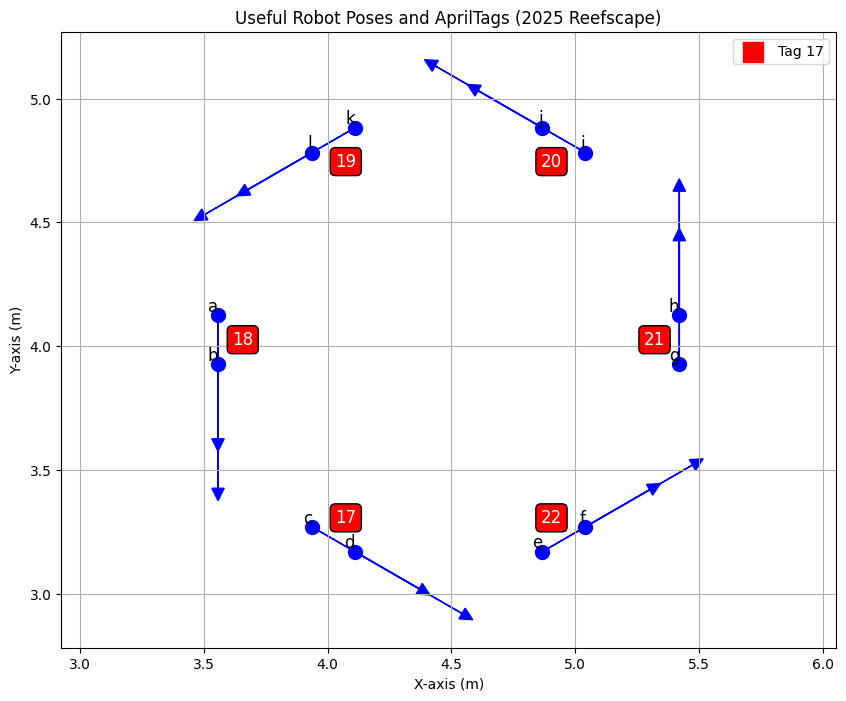

In [28]:
# damn i gotta start using chatgpt more
import matplotlib.pyplot as plt
import numpy as np
import math
from robotpy_apriltag import AprilTagFieldLayout, AprilTagField
from wpimath.geometry import Pose2d, Rotation2d, Translation2d

# Load the AprilTag field layout
layout = AprilTagFieldLayout.loadField(AprilTagField.k2025ReefscapeWelded)

# Dictionary to store robot poses
k_useful_robot_poses_blue = {}

# Tag-to-branch name mapping
branch_names = ["cd", "ab", "kl", "ij", "gh", "ef"]

# Store tag positions for plotting
tag_positions = {}

# Compute useful robot poses
for tag_id in range(17, 23):
    branch_name_idx = tag_id - 17

    this_face_tag_pose = layout.getTagPose(tag_id)

    if this_face_tag_pose:
        # Get the tag's position and rotation
        tag_translation = this_face_tag_pose.translation().toTranslation2d()
        tag_yaw = Rotation2d(this_face_tag_pose.rotation().Z())

        # Store the tag position for plotting
        tag_positions[tag_id] = (tag_translation.X(), tag_translation.Y())

        # Compute robot rotation and offsets
        robot_rotation = tag_yaw + Rotation2d(math.radians(90))
        robot_offset_left = Translation2d(.1, -.1).rotateBy(tag_yaw)
        robot_offset_right = Translation2d(.1, .1).rotateBy(tag_yaw)

        # Compute robot positions
        left_branch_position = tag_translation + robot_offset_left
        right_branch_position = tag_translation + robot_offset_right

        # Get branch names
        left_branch_name = branch_names[branch_name_idx][0]
        right_branch_name = branch_names[branch_name_idx][1]

        # Store poses
        k_useful_robot_poses_blue[left_branch_name] = Pose2d(left_branch_position, robot_rotation)
        k_useful_robot_poses_blue[right_branch_name] = Pose2d(right_branch_position, robot_rotation)

# Plot setup
plt.figure(figsize=(10, 8))

# Plot tag locations
for tag_id, (x, y) in tag_positions.items():
    plt.scatter(x, y, color="red", marker="s", s=200, label=f"Tag {tag_id}" if tag_id == 17 else "")
    plt.text(x, y, f"{tag_id}", fontsize=12, ha="center", va="center", color="white", bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3'))

# Plot robot poses
for name, pose in k_useful_robot_poses_blue.items():
    x, y = pose.X(), pose.Y()
    theta = pose.rotation().radians()  # Get heading in radians

    # Plot robot position
    plt.scatter(x, y, color="blue", s=100)

    # Plot an arrow to indicate orientation
    arrow_length = 0.5
    plt.arrow(x, y, arrow_length * np.cos(theta), arrow_length * np.sin(theta),
              head_width=0.05, head_length=0.05, fc="blue", ec="blue")

    # Label robot pose
    plt.text(x, y, name, fontsize=12, ha="right", va="bottom")

# Set labels and grid
plt.xlabel("X-axis (m)")
plt.ylabel("Y-axis (m)")
plt.title("Useful Robot Poses and AprilTags (2025 Reefscape)")
plt.legend()
plt.grid(True)
plt.axis("equal")  # Maintain aspect ratio

# Show the plot
plt.show()